In [1]:
#Library needed

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

#this line will allow to set an option in pandas for it display all the columns of the dataset 
# what ever the number
pd.set_option('display.max_columns', None)

In [2]:
#Importing the file traits_combined_2023

trait = pd.read_excel("C:/Users/marie/Documents/DSTI_Cours/Python_Class/Python_Lab/Exam_project/Project 2/Resources/doi_10_5061_dryad_xpnvx0kmn__v20230901/traits_combined_2023.xlsx")


In [3]:
trait.head()

,Species,Sp,Family,Genus,Spec,MaxLengthTL,Body_size_max,MaxLengthSL,MaxJuvLength,AspectRatio,AspectRatio_Q,Log_AR,swim_type,swim_mode,body_shape,Total.length.Body.depth.ratio,presence_defense,ComDepthMax,DepthMax,Depth_min,Depth_max,Depth_range,Troph,Trophic_level,Diet.x,Diet.y,Nocturnal,Diel_activity,shoaling,Size_group,Position.in.water.column.,Level_water,Specialist,Fished,Spawn,Spawning,Brackish,Multihabitat,Rafter,Relief,Coral,Cryptic,random,Home_range
0,Abudefduf saxatilis,Abudefduf_saxatilis,POMACENTRIDAE,Abudefduf,saxatilis,22.90,23.0,16.82,6.0,1.53883,1.538830,0.431022,pectoral,labriform,short and / or deep,2.50,0,10,20,0.0,40.0,40.0,3.82,38.0,H,om,0,day,shoaling,smallg,demersal,low,1.0,1,DEM,demersal,NO,NO,YES,19.283335,2.155649,0,9316,mob
1,Acanthostracion quadricornis,Acanthostracion_quadricornis,OSTRACIIDAE,Acanthostracion,quadricornis,55.00,55.0,45.10,NaN,1.36959,1.369590,0.314511,dorsal_ventral,tetraodontiform,short and / or deep,3.30,1,30,80,1.0,80.0,79.0,2.68,27.0,C,im,0,day,solitary,sol,demersal,bottom,0.0,1,BAL,pelagic,NO,YES,YES,-4.402829,1.317257,0,6902,mob
2,Acanthostracion polygonius,Acanthostracion_polygonius,OSTRACIIDAE,Acanthostracion,polygonius,50.00,50.0,41.00,NaN,0.38000,0.375069,NaN,dorsal_ventral,tetraodontiform,short and / or deep,3.23,1,42,90,3.0,80.0,77.0,2.03,2.0,H,is,0,day,solitary,sol,demersal,low,0.0,1,BAL,pelagic,NO,NO,NO,-0.916844,0.822614,0,5100,mob
3,Acanthurus bahianus,Acanthurus_bahianus,ACANTHURIDAE,Acanthurus,bahianus,46.48,381.0,38.10,7.0,2.42851,2.430000,0.887278,pectoral,labriform,short/deep,2.70,1,25,40,2.0,40.0,38.0,2.00,2.0,H,hd,0,day,shoaling,medg,demersal,low,0.0,1,PEL,pelagic,NO,YES,NO,-6.458161,-2.629728,0,1201,mob
4,Acanthurus chirurgus,Acanthurus_chirurgus,ACANTHURIDAE,Acanthurus,chirurgus,39.00,39.0,31.98,8.0,1.87360,1.867165,0.627862,pectoral,labriform,short/deep,2.30,1,15,25,2.0,25.0,23.0,2.09,2.0,H,hd,0,day,shoaling,medg,demersal,low,0.0,1,PEL,pelagic,NO,YES,NO,-6.180233,-3.265823,0,3688,mob


In [4]:
trait.isna().sum()

Species                           0
Sp                                0
Family                            0
Genus                             0
Spec                              0
MaxLengthTL                       0
Body_size_max                     1
MaxLengthSL                       0
MaxJuvLength                     53
AspectRatio                       0
AspectRatio_Q                     0
Log_AR                            8
swim_type                         0
swim_mode                         0
body_shape                        0
Total.length.Body.depth.ratio     1
presence_defense                  0
ComDepthMax                       0
DepthMax                          0
Depth_min                         1
Depth_max                         1
Depth_range                       1
Troph                             0
Trophic_level                     1
Diet.x                            0
Diet.y                            1
Nocturnal                         0
Diel_activity               

It seems in this dataset he has not a high number of missing value.
Has it is described by the authors, the coral and relief variables are derived from the density models and are related to the fish density.

The count of missing value identify the presence of NaN in:
- Home_range = 1 
- *Coral = 11 which correspond to the percent contribution of coral cover to overall fish density derived from density models*
- *Relief = 11 which correspond to the percent contribution of maximum hard relief to overall fish density derived from density models*
- Spawning = 1
- Spawn = 1
- Specialist = 2
- level_water = 1
- Size_group = 1
- Diel_activity = 1
- Diet.y = 1 *this feature isn't used by the authors in their model*
- Trophic_level = 1
- Depth_min = 1
- Depth_max = 1
- Depth_range = 1
- Total.length.Body.depth.ratio = 1
- *MaxJuvLength = 53 which correspond to the maximum length of juvenile stages*
- Body_size_max = 1

In italic the feature with the highest number of missing data. 

In [5]:
#missing data for the coral and relief features

trait.loc[(trait.Coral.isna() & trait.Relief.isna()), :]

,Species,Sp,Family,Genus,Spec,MaxLengthTL,Body_size_max,MaxLengthSL,MaxJuvLength,AspectRatio,AspectRatio_Q,Log_AR,swim_type,swim_mode,body_shape,Total.length.Body.depth.ratio,presence_defense,ComDepthMax,DepthMax,Depth_min,Depth_max,Depth_range,Troph,Trophic_level,Diet.x,Diet.y,Nocturnal,Diel_activity,shoaling,Size_group,Position.in.water.column.,Level_water,Specialist,Fished,Spawn,Spawning,Brackish,Multihabitat,Rafter,Relief,Coral,Cryptic,random,Home_range
31,Coryphopterus dicrus,Coryphopterus_dicrus,GOBIIDAE,Coryphopterus,dicrus,5.0,5.0,4.10,NaN,0.456147,0.456147,-0.784940,pectoral,diodontiform,elongated,6.3,0,12,20,3.0,20.0,17.0,2.68,27.0,H,om,0,day,solitary,smallg,benthic,bottom,0.0,0,DEM,demersal,NO,YES,NO,NaN,NaN,1,1957,sed
32,Coryphopterus glaucofraenum,Coryphopterus_glaucofraenum,GOBIIDAE,Coryphopterus,glaucofraenum,8.0,8.0,6.56,NaN,0.730450,0.671503,-0.314094,pectoral,diodontiform,elongated,5.7,0,24,45,2.0,45.0,43.0,2.67,27.0,H,om,0,day,solitary,smallg,benthic,bottom,0.0,0,DEM,demersal,NO,YES,NO,NaN,NaN,1,9326,sed
33,Coryphopterus personatus,Coryphopterus_personatus,GOBIIDAE,Coryphopterus,personatus,4.0,4.0,3.28,NaN,1.408270,1.408270,0.342362,pectoral,diodontiform,elongated,5.3,0,46,46,3.0,46.0,43.0,2.68,27.0,H,pk,0,day,schooling,sol,demersal,bottom,1.0,0,DEM,demersal,NO,NO,NO,NaN,NaN,1,2411,sed
36,Elacatinus oceanops,Elacatinus_oceanops,GOBIIDAE,Elacatinus,oceanops,5.0,5.0,4.10,NaN,1.400230,1.400230,0.336637,pectoral,diodontiform,fusiform / normal,5.9,0,40,45,1.0,45.0,44.0,3.50,35.0,C,im,0,day,solitary,smallg,benthic,bottom,1.0,0,DEM,demersal,NO,NO,NO,NaN,NaN,1,1405,sed
39,Gnatholepis thompsoni,Gnatholepis_thompsoni,GOBIIDAE,Gnatholepis,thompsoni,8.2,82.0,6.36,NaN,0.576185,0.576185,-0.551326,pectoral,diodontiform,fusiform / normal,5.3,0,36,50,0.0,50.0,50.0,2.29,23.0,H,om,0,day,solitary,smallg,benthic,bottom,0.0,0,DEM,demersal,NO,YES,NO,NaN,NaN,1,1358,sed
40,Gymnothorax moringa,Gymnothorax_moringa,MURAENIDAE,Gymnothorax,moringa,200.0,200.0,164.00,NaN,0.700000,0.700000,-0.356675,body_caudal,anguilliform,eel-like,16.7,0,35,200,0.0,200.0,200.0,4.50,45.0,P,fc,1,both,solitary,sol,benthic,bottom,0.0,1,PEL,pelagic,NO,YES,NO,NaN,NaN,1,7069,sed
75,Malacoctenus macropus,Malacoctenus_macropus,LABRISOMIDAE,Malacoctenus,macropus,5.5,55.0,4.51,NaN,1.319500,1.319500,0.277253,pectoral,diodontiform,fusiform / normal,4.5,0,2,8,0.0,8.0,8.0,3.35,34.0,C,im,0,day,solitary,sol,benthic,bottom,0.0,0,DEM,demersal,NO,YES,NO,NaN,NaN,1,5938,sed
76,Malacoctenus triangulatus,Malacoctenus_triangulatus,LABRISOMIDAE,Malacoctenus,triangulatus,7.5,75.0,6.15,NaN,1.000560,1.000560,0.000560,pectoral,diodontiform,fusiform / normal,5.2,0,3,40,0.0,15.0,15.0,3.50,35.0,C,im,0,day,solitary,sol,benthic,bottom,1.0,0,DEM,demersal,NO,NO,NO,NaN,NaN,1,2033,sed
84,Parablennius marmoreus,Parablennius_marmoreus,BLENNIIDAE,Parablennius,marmoreus,8.5,85.0,6.97,NaN,1.411200,1.400000,0.344440,pectoral,diodontiform,fusiform / normal,5.1,0,6,10,0.0,10.0,10.0,2.46,25.0,H,im,0,day,solitary,sol,benthic,bottom,1.0,0,DEM,demersal,NO,NO,NO,NaN,NaN,1,1468,sed
89,Ptereleotris calliura,Ptereleotris_calliura,GOBIIDAE,Ptereleotris,calliura,12.5,125.0,10.25,NaN,0.730780,0.730780,-0.313643,pectoral,diodontiform,elongated,9.3,0,28,50,5.0,50.0,45.0,3.40,34.0,Z,pk,0,day,solitary,pair,benthic,low,1.0,0,DEM,demersal,NO,YES,NO,NaN,NaN,1,2403,sed


We can shows that, the 11 missing values in Coral and Relief are both in the sames rows. 

In [6]:
trait.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 44 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Species                        120 non-null    object 
 1   Sp                             120 non-null    object 
 2   Family                         120 non-null    object 
 3   Genus                          120 non-null    object 
 4   Spec                           120 non-null    object 
 5   MaxLengthTL                    120 non-null    float64
 6   Body_size_max                  119 non-null    float64
 7   MaxLengthSL                    120 non-null    float64
 8   MaxJuvLength                   67 non-null     float64
 9   AspectRatio                    120 non-null    float64
 10  AspectRatio_Q                  120 non-null    float64
 11  Log_AR                         112 non-null    float64
 12  swim_type                      120 non-null    obj

Most of the features here are categorical.

In [7]:
trait.describe()

,MaxLengthTL,Body_size_max,MaxLengthSL,MaxJuvLength,AspectRatio,AspectRatio_Q,Log_AR,Total.length.Body.depth.ratio,presence_defense,ComDepthMax,DepthMax,Depth_min,Depth_max,Depth_range,Troph,Trophic_level,Nocturnal,Specialist,Fished,Relief,Coral,Cryptic,random
count,120.000000,119.000000,120.000000,67.000000,120.000000,120.000000,112.000000,119.000000,120.000000,120.000000,120.000000,119.000000,119.000000,119.000000,120.000000,119.000000,120.000000,118.000000,120.000000,109.000000,109.000000,120.000000,120.000000
mean,43.986750,90.361345,36.606083,11.208955,1.733621,1.728393,0.459358,3.934370,0.166667,32.525000,69.125000,2.310924,70.798319,68.487395,3.254917,27.327731,0.158333,0.406780,0.533333,4.522800,1.523872,0.091667,4852.683333
std,38.674115,137.771657,33.009805,7.312375,0.774097,0.781303,0.421621,2.006749,0.374241,36.503473,68.391921,3.931075,65.335585,64.327402,0.760697,15.339718,0.366584,0.493328,0.500979,7.271063,5.315977,0.289765,2903.997219
min,4.000000,4.000000,3.280000,3.000000,0.380000,0.375069,-0.784940,1.600000,0.000000,2.000000,3.000000,0.000000,8.000000,8.000000,2.000000,2.000000,0.000000,0.000000,0.000000,-13.971772,-10.247201,0.000000,35.000000
25%,15.240000,22.500000,12.500000,6.000000,1.197148,1.195903,0.179941,2.900000,0.000000,15.000000,25.000000,0.500000,30.000000,30.000000,2.680000,12.500000,0.000000,0.000000,0.000000,-0.575752,-1.162476,0.000000,2278.250000
50%,35.000000,46.000000,28.700000,9.000000,1.550755,1.550755,0.438712,3.500000,0.000000,25.000000,50.000000,1.000000,50.000000,49.000000,3.460000,34.000000,0.000000,0.000000,1.000000,5.131455,1.765955,0.000000,5061.000000
75%,57.000000,90.000000,48.367500,15.000000,2.063108,2.104204,0.724213,4.500000,0.000000,40.000000,91.250000,3.000000,91.000000,87.500000,3.740000,37.000000,0.000000,1.000000,1.000000,9.445818,3.199064,0.000000,7057.000000
max,200.000000,863.000000,178.880000,41.000000,4.515040,4.515040,1.507414,16.700000,1.000000,330.000000,400.000000,30.000000,400.000000,398.000000,4.510000,45.000000,1.000000,1.000000,1.000000,21.161932,41.486844,1.000000,9917.000000


The described statistics shows that:
- the different features has different scales
- has in the species dataframe, the random feature is their to establish the influence of the other feature on the target.
- the presence_defense, Nocturnal, Specialist, and fished features are in binary value (1/0). The mean is equal to 0.16 for presence_defense, 0.15 for nocturnal, 0.4 for specialist, and 0.5 for fished meaning the categorie 0 is over represented compared to the category 1 for nocturnal and presence_defense. This feature is clearly imbalanced. The balance seems to be quit equal for the specialist and fished. *Need to see its utility in predicting the fish diversity*
- the feature troph and trphic level are redundant.
- for many of these features the difference between the value of the max and the Q3 are really high suggested the observations are sparced and maybe with a rigth repartition.

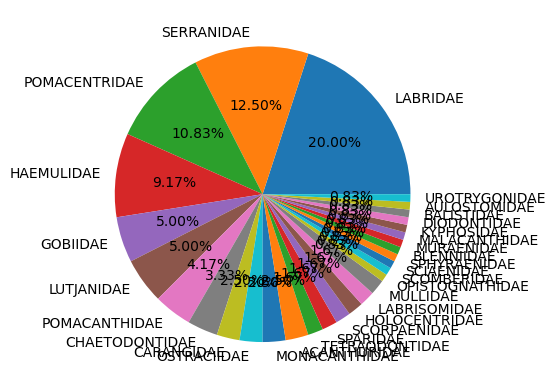

In [8]:
#the repartition of the observation accross the species family feature

plt.pie(trait['Family'].value_counts(),labels=trait['Family'].value_counts().index,autopct='%1.2f%%')
plt.show()

In [9]:
len(trait['Family'].unique())

30

In [10]:
trait['Family'].value_counts()

Family
LABRIDAE           24
SERRANIDAE         15
POMACENTRIDAE      13
HAEMULIDAE         11
GOBIIDAE            6
LUTJANIDAE          6
POMACANTHIDAE       5
CHAETODONTIDAE      4
CARANGIDAE          3
OSTRACIIDAE         3
MONACANTHIDAE       3
ACANTHURIDAE        3
TETRAODONTIDAE      2
SPARIDAE            2
SCORPAENIDAE        2
HOLOCENTRIDAE       2
LABRISOMIDAE        2
MULLIDAE            2
OPISTOGNATHIDAE     1
SCOMBERIDAE         1
SCIAENIDAE          1
SPHYRAENIDAE        1
BLENNIIDAE          1
MURAENIDAE          1
MALACANTHIDAE       1
KYPHOSIDAE          1
DIODONTIDAE         1
BALISTIDAE          1
AULOSTOMIDAE        1
UROTRYGONIDAE       1
Name: count, dtype: int64

In this study they find 30 different fish species families. The most represented are LABRIDAE, SERRANIDAE ,POMACENTRIDAE, and HAEMULIDAE.      

In [11]:
Family_nb_dif_Sp = trait.groupby('Family')['Sp'].unique().to_dict()
Family_nb_dif_Sp

{'ACANTHURIDAE': array(['Acanthurus_bahianus', 'Acanthurus_chirurgus',
        'Acanthurus_coeruleus'], dtype=object),
 'AULOSTOMIDAE': array(['Aulostomus_maculatus'], dtype=object),
 'BALISTIDAE': array(['Balistes_capriscus'], dtype=object),
 'BLENNIIDAE': array(['Parablennius_marmoreus'], dtype=object),
 'CARANGIDAE': array(['Carangoides_bartholomaei', 'Caranx_crysos', 'Caranx_ruber'],
       dtype=object),
 'CHAETODONTIDAE': array(['Chaetodon_capistratus', 'Chaetodon_ocellatus',
        'Chaetodon_sedentarius', 'Chaetodon_striatus'], dtype=object),
 'DIODONTIDAE': array(['Diodon_holocanthus'], dtype=object),
 'GOBIIDAE': array(['Coryphopterus_dicrus', 'Coryphopterus_glaucofraenum',
        'Coryphopterus_personatus', 'Elacatinus_oceanops',
        'Gnatholepis_thompsoni', 'Ptereleotris_calliura'], dtype=object),
 'HAEMULIDAE': array(['Anisotremus_surinamensis', 'Anisotremus_virginicus',
        'Haemulon_aurolineatum', 'Haemulon_carbonarium',
        'Haemulon_chrysargyreum', 'Haemu

In [12]:
Family_nb_dif_Sp.keys()


dict_keys(['ACANTHURIDAE', 'AULOSTOMIDAE', 'BALISTIDAE', 'BLENNIIDAE', 'CARANGIDAE', 'CHAETODONTIDAE', 'DIODONTIDAE', 'GOBIIDAE', 'HAEMULIDAE', 'HOLOCENTRIDAE', 'KYPHOSIDAE', 'LABRIDAE', 'LABRISOMIDAE', 'LUTJANIDAE', 'MALACANTHIDAE', 'MONACANTHIDAE', 'MULLIDAE', 'MURAENIDAE', 'OPISTOGNATHIDAE', 'OSTRACIIDAE', 'POMACANTHIDAE', 'POMACENTRIDAE', 'SCIAENIDAE', 'SCOMBERIDAE', 'SCORPAENIDAE', 'SERRANIDAE', 'SPARIDAE', 'SPHYRAENIDAE', 'TETRAODONTIDAE', 'UROTRYGONIDAE'])

In [13]:
len(np.unique(Family_nb_dif_Sp['ACANTHURIDAE']))

3

In [14]:
#iterate over the dict to return the len of each array 
#each array contain the name of the species find in the survey for one family. the len represent the number of species for this family.

for keys in Family_nb_dif_Sp:
    nb_species = len(np.unique(Family_nb_dif_Sp[keys]))
    print(f'for the family: {keys} the number of different species is: {nb_species}')

for the family: ACANTHURIDAE the number of different species is: 3
for the family: AULOSTOMIDAE the number of different species is: 1
for the family: BALISTIDAE the number of different species is: 1
for the family: BLENNIIDAE the number of different species is: 1
for the family: CARANGIDAE the number of different species is: 3
for the family: CHAETODONTIDAE the number of different species is: 4
for the family: DIODONTIDAE the number of different species is: 1
for the family: GOBIIDAE the number of different species is: 6
for the family: HAEMULIDAE the number of different species is: 11
for the family: HOLOCENTRIDAE the number of different species is: 2
for the family: KYPHOSIDAE the number of different species is: 1
for the family: LABRIDAE the number of different species is: 24
for the family: LABRISOMIDAE the number of different species is: 2
for the family: LUTJANIDAE the number of different species is: 6
for the family: MALACANTHIDAE the number of different species is: 1
for the fa

In function of the family the number of species identify on the survey site are different suggested a link between the family and the diversity index.

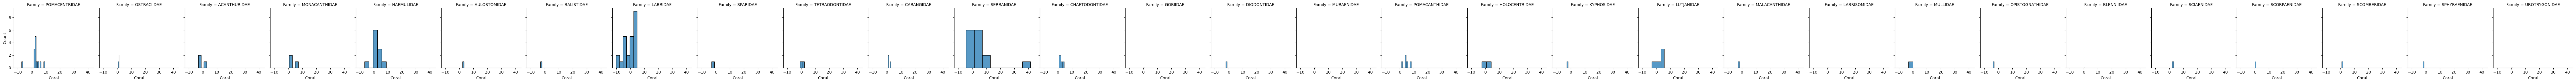

In [27]:
g = sns.FacetGrid(data=trait,col="Family")
g.map(sns.histplot,"Coral")
plt.tight_layout()
plt.show()

The plot shows that:
- all the family aren't present in place where it as coral
- the family most present in the coral are Pomacentridae, Haemulidae, labridae, and serranidae. These fish's family shows a high number of species observe for the study (btw 11 to 24). Perhaps they are principaly observed in site where we can find between 0 to 10% of coral cover. 

This suggest that the fish presence could be low in coral site. Only specific type of fish will be able to live there. 


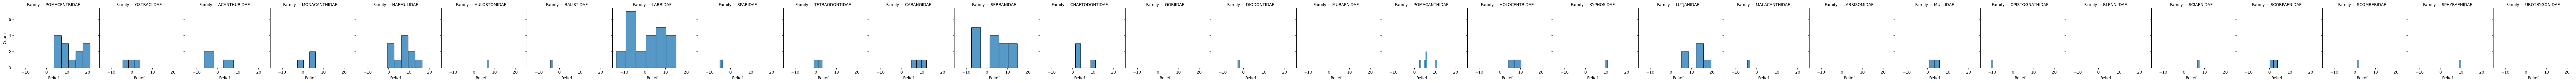

In [29]:
g = sns.FacetGrid(data=trait,col="Family")
g.map(sns.histplot,"Relief")
plt.tight_layout()
plt.show()

The fish are principally find in site with 0 to 20% of relief cover. We can observed the predominante families are present on their site more around a cover btw 10 to 20%. On the contrary the low represented fish are close to 0. 

We can plot the coral cover in function of the family as well as the relief in function of family.

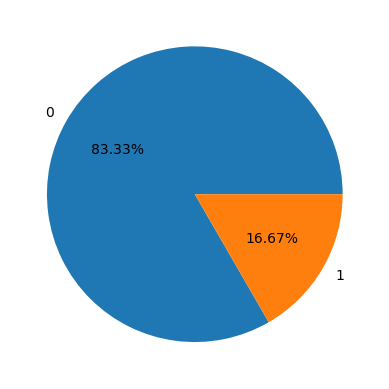

In [15]:
#the repartition of the observation accross the presence_defense feature

plt.pie(trait['presence_defense'].value_counts(),labels=trait['presence_defense'].value_counts().index,autopct='%1.2f%%')
plt.show()

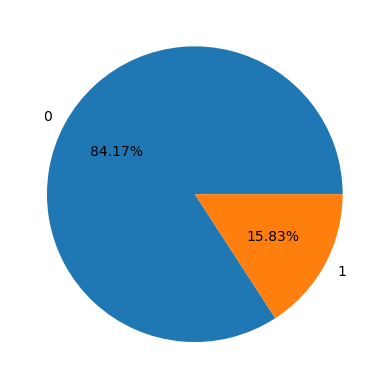

In [16]:
#the repartition of the observation accross the Nocturnal feature

plt.pie(trait['Nocturnal'].value_counts(),labels=trait['Nocturnal'].value_counts().index,autopct='%1.2f%%')
plt.show()

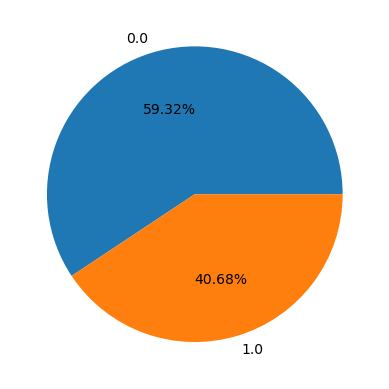

In [17]:
#the repartition of the observation accross the specialist feature
#1 = fish specialist of the relief

plt.pie(trait['Specialist'].value_counts(),labels=trait['Specialist'].value_counts().index,autopct='%1.2f%%')
plt.show()

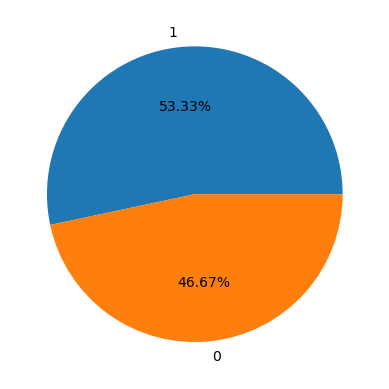

In [18]:
#the repartition of the observation accross the fished feature
#1 = fished 

plt.pie(trait['Fished'].value_counts(),labels=trait['Fished'].value_counts().index,autopct='%1.2f%%')
plt.show()

In [19]:
#for all the numerical variable
px.imshow(trait.loc[:, ['MaxLengthTL','Body_size_max','MaxLengthSL', 'MaxJuvLength', 'AspectRatio', 'AspectRatio_Q', 'Log_AR', 'Total.length.Body.depth.ratio', 'presence_defense', 'ComDepthMax', 'DepthMax', 'Depth_min', 'Depth_max', 'Troph', 'Trophic_level', 'Nocturnal', 'Specialist', 'Fished', 'Relief', 'Coral', 'Cryptic', 'random']].corr())

The correlation matrix shows that:
- to consider if a feature is really in correlation with the other we can refer to the correlation score with the random feature which correspond to nothing for the model. 
- The relief shows a strong negative correlation with presence_defense and a positive with coral, specialist and fished features. 
- The coral shows a strong positive correlation with specialist and relief and a strong negatif with Total.length.body.depth.ratio(describe the fineness of the fish) and the trophic_level
- A strong relation exist between Depth_max and ComDepthMax as well as Depth_min and ComDepthMax. These features represent the Depth where we can find the fish. The comDepthMax is the commun depth where the fish evolve. *Maybe the ComDepthMax should be necessary to keep and the other can be drop to avoid redondancy*
- the features MaxLengthTL and SL are in strong correlation (arround 0.9) suggested they are redundant. The authors describe these feature has the maximum total length in cm for TL and SL it's the same but standardized. The standardized method isn't precised here. *Maybe keep the MaxLengthSL and drop the TL to avoid redundancy*. 
- the aspect ratio and the Log_AR are redundant because the Log_AR is the log of the aspect ratio value. The aspect ratio shows no missing value on the contrary for the Log_AR. *Keep the aspect ratio and drop the log the same for the aspect ration Q*.

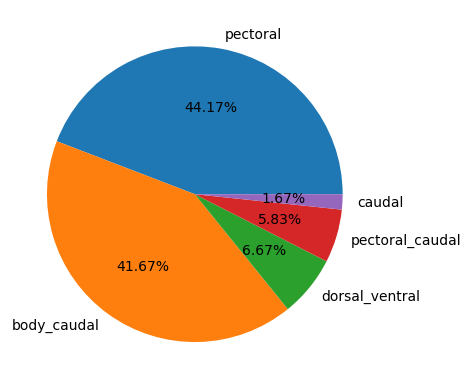

In [20]:
#the repartition of the observation accross the swim type feature

plt.pie(trait['swim_type'].value_counts(),labels=trait['swim_type'].value_counts().index,autopct='%1.2f%%')
plt.show()

Principally the fish has a pectoral or body_caudal mode of swiming the other categories are under reprented.

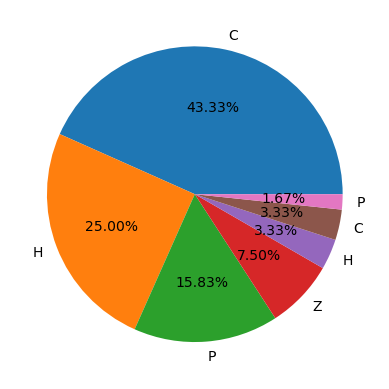

In [21]:
#the repartition of the observation accross the diet.x feature

plt.pie(trait['Diet.x'].value_counts(),labels=trait['Diet.x'].value_counts().index,autopct='%1.2f%%')
plt.show()

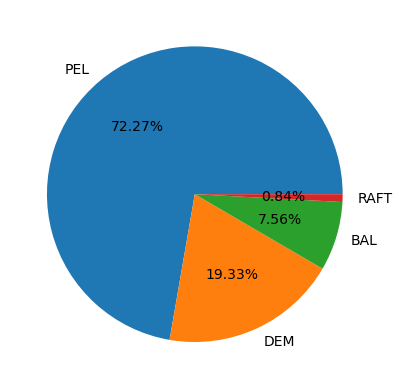

In [22]:
#the repartition of the observation accross the Spawn feature

plt.pie(trait['Spawn'].value_counts(),labels=trait['Spawn'].value_counts().index,autopct='%1.2f%%')
plt.show()

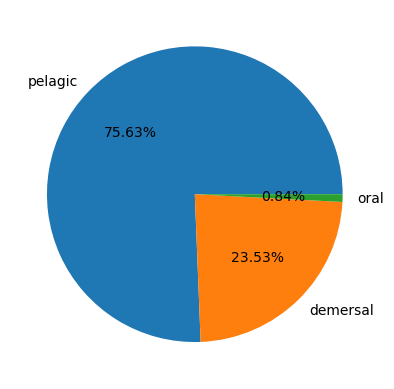

In [23]:
#the repartition of the observation accross the Spawning feature

plt.pie(trait['Spawning'].value_counts(),labels=trait['Spawning'].value_counts().index,autopct='%1.2f%%')
plt.show()

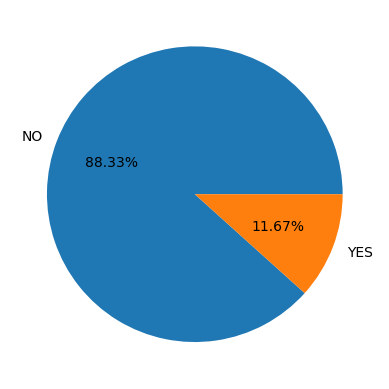

In [24]:
#the repartition of the observation accross the Brackish feature

plt.pie(trait['Brackish'].value_counts(),labels=trait['Brackish'].value_counts().index,autopct='%1.2f%%')
plt.show()

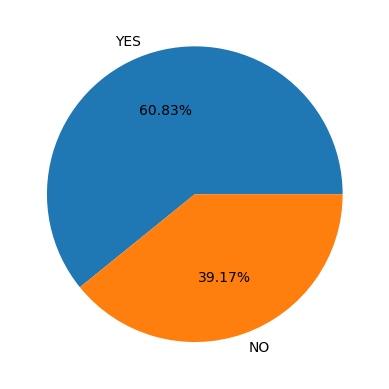

In [25]:
#the repartition of the observation accross the Multihabitat feature

plt.pie(trait['Multihabitat'].value_counts(),labels=trait['Multihabitat'].value_counts().index,autopct='%1.2f%%')
plt.show()

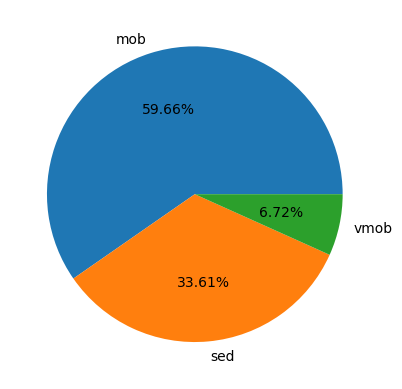

In [26]:
#the repartition of the observation accross the Home_range feature

plt.pie(trait['Home_range'].value_counts(),labels=trait['Home_range'].value_counts().index,autopct='%1.2f%%')
plt.show()